# Pandas

In [2]:
import pandas as pd
import numpy as np
import math

## Creating a DataFrame

There are two ways of calling a column in a DataFrame as a series


In [ ]:
#1 With single double brackets

df['order_status']

#2 As an attribute

orders.order_status


## Pandas Methods

### pd.Series.unique() Method

This method can be used with pandas **Series**, not DataFrames, and will return a list of all the unique values in the series. 

In [ ]:
df['order_status'].unique()

In [ ]:
df.order_status.unique()

### pd.to_datetime() Method

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Note that in the example below, the information within a dataframe should be called as a Series (with single brackets), not as the column of a dataframe.

If a DataFrame is provided, the method expects minimally the following columns: "year", "month", "day".

In [97]:
# Create DataFrame Of String Format Dates

df = pd.DataFrame({'Date':["2022-08-23",
                           "2022-08-23",
                           "2022-08-23",
                           "2022-08-23"]
                  }
                 )

display(df)
print('\n')
display(df.info())

,Date
0,2022-08-23
1,2022-08-23
2,2022-08-23
3,2022-08-23




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


None

#### Converting A Series To DateTime & Back

In [95]:
# Convert 'Date' Column with 'to_datetime()' function

df["Date"]= pd.to_datetime(df["Date"])

display(df.info())

# Convert back to string format with specified date format

df['Date'].dt.strftime('%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 200.0 bytes


None

0    2022-08-23
1    2022-08-23
2    2022-08-23
3    2022-08-23
4    2022-08-23
5    2022-08-23
6    2022-08-23
7    2022-08-23
8    2022-08-23
Name: Date, dtype: object

#### Converting A Single Value To DateTime & Back

You can convert a single string to datetime and convert a datetime 'timestamp' back as below. You need to use this method when dealing with a single datapoint, as opposed to a series. 

In [77]:
str_date = "2022-08-23"
print(str_date)

date = pd.to_datetime(str_date)

print(date)
print(type(date))

str_date = str(date).split()
print(str_date)

print(str_date[0])

2022-08-23
2022-08-23 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
['2022-08-23', '00:00:00']
2022-08-23


#### pd.DateOffset()

In [79]:
print(date)

print(date + pd.DateOffset(years = 1,
                          months = 1,
                          weeks = 1, 
                          days = 1, 
                          hours = 1, 
                          minutes = 1, 
                          seconds = 1)
     )


2022-08-23 00:00:00
2023-10-01 01:01:01


### pd.DataFrame.groupby() Method

Needs to have an action to do on the rows not being 'grouped by'.

In [ ]:
df[['order_id','product_id']].groupby('order_id').count()

In [ ]:
df[['order_id','product_id']].groupby('order_id').sum()

In [ ]:
order_items[['order_id','seller_id']].groupby('order_id').nunique()

### pd.Series.agg() Method

**CAN BE USED IN GROUPBY() ON A DATAFRAME**

Allows you to perform different operations on columns that are grouped in a single 

In [ ]:
df[['order_id','price','freight_value']].groupby('order_id').agg({'price': ['sum', 'mean'], 'freight_value': 'mean' })

If you need to join multiple string columns, you can use agg:

In [ ]:
df['period'] = df[['Year', 'quarter', ...]].agg('-'.join, axis=1)

### pd.DataFrame.merge() Method

This can be written in two different ways, allowing for both chaining or nesting of multiple merges.

In [ ]:
A_df.merge(B_df, how='left', on='order_id')

In [ ]:
pd.merge(A_df, B_df, how='left', on='order_id')

In [ ]:
df.query("order_status == 'delivered'")

### pd.Series.map() Method

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

Below is how you would use the map() method to change certain values in a series to another, using a dictionary.

In [8]:
df = pd.DataFrame({'Stuff':['cat', 'dog', np.nan, 'rabbit']})

df.Stuff

0       cat
1       dog
2       NaN
3    rabbit
Name: Stuff, dtype: object

-- You can substitute stuff with a dictionary. **Note that anything not specified is converted to a NaN**

In [10]:
df.Stuff.map({
    'cat': 'kitten', 
    'dog': 'puppy'
})

0    kitten
1     puppy
2       NaN
3       NaN
Name: Stuff, dtype: object

-- It also accepts a function

In [12]:
df.Stuff.map('I am a {}'.format)

0       I am a cat
1       I am a dog
2       I am a nan
3    I am a rabbit
Name: Stuff, dtype: object

-- To avoid applying the function to missing values (and keep them as NaN) na_action='ignore' can be used:

In [13]:
df.Stuff.map('I am a {}'.format, na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
Name: Stuff, dtype: object

### pd.Series.apply() Method


First you defind a function. 

Then you can use the pd.Series.apply() method to apply the function of a column of a dataframe. 

In [ ]:
# Define the function

def txt_rp(x):

    for punc in string.punctuation:
        x = x.replace(punc, '')    

    return x

# Use the apply method to apply it to a column of a DataFrame

df['clean_text'] = df['text'].apply(txt_rp)

### Using The Lambda Function (pd.DataFrame.apply() and pd.DataFrame.assign() Methods)


**Example 1**: Applying lambda function to single column using Dataframe.assign()

In the below example, the lambda function is applied to the ‘Total_Marks’ column and a new column ‘Percentage’ is formed with the help of it.

In [2]:
import pandas as pd
  
# creating and initializing a list
values= [['Rohan',455],['Elvish',250],['Deepak',495],
         ['Soni',400],['Radhika',350],['Vansh',450]]
 
# creating a pandas dataframe
df = pd.DataFrame(values,columns=['Name','Total_Marks'])
 
# Applying lambda function to find
# percentage of 'Total_Marks' column
# using df.assign()
df = df.assign(Percentage = lambda x: (x['Total_Marks'] /500 * 100))
 
# displaying the data frame
df

,Name,Total_Marks,Percentage
0,Rohan,455,91.0
1,Elvish,250,50.0
2,Deepak,495,99.0
3,Soni,400,80.0
4,Radhika,350,70.0
5,Vansh,450,90.0


**Example 2**: Applying lambda function to multiple columns using Dataframe.assign()

In the below example, lambda function is applied to 3 columns i.e ‘Field_1’, ‘Field_2’, and ‘Field_3’.

In [1]:
# importing pandas library
import pandas as pd
 
# creating and initializing a nested list
values_list = [[15, 2.5, 100], [20, 4.5, 50], [25, 5.2, 80],
               [45, 5.8, 48], [40, 6.3, 70], [41, 6.4, 90],
               [51, 2.3, 111]]
 
# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'])
 
# Applying lambda function to find
# the product of 3 columns using
# df.assign()
df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
 
# printing dataframe
df

,Field_1,Field_2,Field_3,Product
0,15,2.5,100,3750.0
1,20,4.5,50,4500.0
2,25,5.2,80,10400.0
3,45,5.8,48,12528.0
4,40,6.3,70,17640.0
5,41,6.4,90,23616.0
6,51,2.3,111,13020.3


**Example 3**: Applying lambda function to single row using Dataframe.apply()

In the below example, a lambda function is applied to row starting with ‘d’ and hence square all values corresponds to it.

In [4]:
import pandas as pd
import numpy as np
 
# creating and initializing a nested list
values_list = [[15, 2.5, 100], [20, 4.5, 50], [25, 5.2, 80],
               [45, 5.8, 48], [40, 6.3, 70], [41, 6.4, 90],
               [51, 2.3, 111]]
 
# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
 
# Apply function numpy.square() to square
# the values of one row only i.e. row
# with index name 'd'

df = df.apply(lambda x: np.square(x) if x.name == 'd' else x, axis=1)

 
# printing dataframe
df

,Field_1,Field_2,Field_3
a,15.0,2.50,100.0
b,20.0,4.50,50.0
c,25.0,5.20,80.0
d,2025.0,33.64,2304.0
e,40.0,6.30,70.0
f,41.0,6.40,90.0
g,51.0,2.30,111.0


**Example 4**: Applying lambda function to multiple rows using Dataframe.apply()

In the below example, a lambda function is applied to 3 rows starting with ‘a’, ‘e’, and ‘g’.

In [4]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np
 
# creating and initializing a nested list
values_list = [[15, 2.5, 100], [20, 4.5, 50], [25, 5.2, 80],
               [45, 5.8, 48], [40, 6.3, 70], [41, 6.4, 90],
               [51, 2.3, 111]]
 
# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
 
 
# Apply function numpy.square() to square
# the values of 3 rows only i.e. with row
# index name 'a', 'e' and 'g' only
df = df.apply(lambda x: np.square(x) if x.name in [
              'a', 'e', 'g'] else x, axis=1)
 
# printing dataframe
df

,Field_1,Field_2,Field_3
a,225.0,6.25,10000.0
b,20.0,4.50,50.0
c,25.0,5.20,80.0
d,45.0,5.80,48.0
e,1600.0,39.69,4900.0
f,41.0,6.40,90.0
g,2601.0,5.29,12321.0


**Example 5**: Applying the lambda function simultaneously to multiple columns and rows

In this example, a lambda function is applied to two rows and three columns. 

In [105]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np
 
# creating and initializing a nested list
values_list = [[1.5, 2.5, 10.0], [2.0, 4.5, 5.0], [2.5, 5.2, 8.0],
               [4.5, 5.8, 4.8], [4.0, 6.3, 70], [4.1, 6.4, 9.0],
               [5.1, 2.3, 11.1]]
 
# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
 
# Apply function numpy.square() to square
# the values of 2 rows only i.e. with row
# index name 'b' and 'f' only
df = df.apply(lambda x: np.square(x) if x.name in ['b', 'f'] else x, axis=1)
 
# Applying lambda function to find product of 3 columns
# i.e 'Field_1', 'Field_2' and 'Field_3'
df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
 
# printing dataframe
df

,Field_1,Field_2,Field_3,Product
a,1.50,2.50,10.0,37.5000
b,4.00,20.25,25.0,2025.0000
c,2.50,5.20,8.0,104.0000
d,4.50,5.80,4.8,125.2800
e,4.00,6.30,70.0,1764.0000
f,16.81,40.96,81.0,55771.5456
g,5.10,2.30,11.1,130.2030


**Example 6**: Creating a new columns using a Lambda function applied to an existing one

In [100]:
import pandas as pd
 
# dataframe
df = pd.DataFrame({'Name': ['John', 'Jack', 'Shri',
                            'Krishna', 'Smith', 'Tessa'],
                   'Maths': [5, 3, 9, 10, 6, 3]})
 
# Adding the result column
df['Result'] = df['Maths'].apply(lambda x: 'Pass' if x>=5 else 'Fail')
 
print(df)

      Name  Maths Result
0     John      5   Pass
1     Jack      3   Fail
2     Shri      9   Pass
3  Krishna     10   Pass
4    Smith      6   Pass
5    Tessa      3   Fail


Adding multiple if statements. **The below will not work**. You need to define the function separately and then use apply to apply it. See the pd.Series.apply() section before this one. 

In [102]:
df['Maths_spl Class'] = df["maths"].apply(lambda x: "No Need" if x>=5 elif x==5 "Hold" else "Need")

SyntaxError: invalid syntax (3022965822.py, line 1)

### pd.DataFrame.iterrows()

In [19]:
data = {
  "firstname": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)

for index, row in df.iterrows():
    print(index)
    print(row["firstname"]) 

0
Sally
1
Mary
2
John


### You Can Also Loop Through A DataFrame With The zip() Function

This is much more computationaly efficient

Lists have to be the same length

In [23]:
print(df.firstname)
print(df.age)

0    Sally
1     Mary
2     John
Name: firstname, dtype: object
0    50
1    40
2    30
Name: age, dtype: int64


In [24]:
zip(df.firstname, df.age)

In [26]:
list(zip(df.firstname, df.age))

[('Sally', 50), ('Mary', 40), ('John', 30)]

### np.where() Function

In [12]:
PE_list = [16.59, 89.34, 25.99, -17.85, -5.33, 92475.83, 538321.17, -57915.06, 31.07, 
          25.11, 35.58, 114.89, -0.28, 10.94, 5.81, 7.24, 8.29, 4.06, 5.85, 4.73, 8.31]

PB_list = [1.26, 1.02, 1.15, 1.72, 1.62, 22891.82, 15246.66, 11165.24, 7.12, 5.5, 5.02,
           1.52, 1.39, 1.21, 0.86, 1.4, 0.85, 0.39, 1.51, 1.23, 1.08]

df_test = pd.DataFrame({
    'PE': PE_list,
    'PB': PB_list
})

df_test['PB_adj'] = np.where(df_test['PB'] > 2000, 
                             df_test['PB'] / 14300,
                             df_test['PB'])

df_test['PE_adj'] = np.where(df_test['PB'] > 2000, 
                             df_test['PE'] / 14300,
                             df_test['PE'])

df_test

,PE,PB,PB_adj,PE_adj
0,16.59,1.26,1.260000,16.590000
1,89.34,1.02,1.020000,89.340000
2,25.99,1.15,1.150000,25.990000
3,-17.85,1.72,1.720000,-17.850000
4,-5.33,1.62,1.620000,-5.330000
5,92475.83,22891.82,1.600827,6.466841
6,538321.17,15246.66,1.066200,37.644837
7,-57915.06,11165.24,0.780786,-4.050004
8,31.07,7.12,7.120000,31.070000
9,25.11,5.50,5.500000,25.110000


In [7]:
PE_list =[1.2567983992314962,
 1.0184001861763141,
 1.1546594762760345,
 1.723692523926225,
 1.6185515662271976,
 22891.82424481982,
 15246.664985933045,
 11165.243623884342,
 7.123141313353461,
 5.497221827168791,
 5.022352364900713,
 1.5227006930481812,
 1.385744023457573,
 1.2057096245388181,
 0.8568993744024426,
 1.402094154527857,
 0.8512689279811179,
 0.39477738001892837,
 1.5117670970898804,
 1.2347138403685203,
 1.0756724530063626]

for i in range(0, len(PE_list)):
    PE_list[i] = round(PE_list[i],2)
    
PE_list


[1.26,
 1.02,
 1.15,
 1.72,
 1.62,
 22891.82,
 15246.66,
 11165.24,
 7.12,
 5.5,
 5.02,
 1.52,
 1.39,
 1.21,
 0.86,
 1.4,
 0.85,
 0.39,
 1.51,
 1.23,
 1.08]

### pd.DataFrame.

## How To Do Stuff

### Read and Write CSV Files

#### Save DataFrame As A CSV

In [23]:
# Create DataFrame

data = pd.DataFrame({
  
    "name": ['sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'java', 'java', 'python',
                 'python', 'python', 'html/php', 'html/php',
                 'html/php', 'php/js', 'php/js', 'php/js'],
    "marks": [98, 79, 89, 97, 82, 98, 90,
              87, 78, 89, 93, 94]
})

data.to_csv('save_files/read_write_data.csv',
            index = False         # Saves the index to a column in the csv file. Defaults to True
           )                     
data.shape

(12, 3)

#### Load CSV File As A DataFrame

In [24]:
data_load = pd.read_csv('save_files/read_write_data.csv', 
                        index_col = None       # Defaults to None, but must be specified if the CSV files has an index column
                       )

data_load

,name,subjects,marks
0,sravan,java,98
1,jyothika,java,79
2,harsha,java,89
3,ramya,python,97
4,sravan,python,82
5,jyothika,python,98
6,harsha,html/php,90
7,ramya,html/php,87
8,sravan,html/php,78
9,jyothika,php/js,89


### How to add another row to a DataFrame

Below are two ways of adding new rows to a DataFrame

In [ ]:
#add row to end of DataFrame

df.loc[len(df.index)] = [value1, value2, value3, ...]

In [ ]:
#append rows of df2 to end of existing DataFrame

df = df.append(df2, ignore_index = True)

### How To Set The Index In A DataFrame

#### Single Index

In [5]:
# creating and initializing a nested list

students = [['jack', 34, 'Sydeny', 'Australia',85.96,400],
            ['Riti', 30, 'Delhi', 'India',95.20,750],
            ['Vansh', 31, 'Delhi', 'India',85.25,101],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21,900],
            ['Maychan', 16, 'New York', 'US',99.63,420],
            ['Mike', 17, 'las vegas', 'US',47.28,555]]
 
# Create a DataFrame object

df = pd.DataFrame(students,
                      columns=['Name', 'Age', 'City', 'Country','Agg_Marks','ID'],
                           index=['a', 'b', 'c', 'd', 'e', 'f'])

df.set_index('Agg_Marks', inplace = True)

df

,Name,Age,City,Country,ID
Agg_Marks,,,,,
85.96,jack,34,Sydeny,Australia,400
95.20,Riti,30,Delhi,India,750
85.25,Vansh,31,Delhi,India,101
74.21,Nanyu,32,Tokyo,Japan,900
99.63,Maychan,16,New York,US,420
47.28,Mike,17,las vegas,US,555


#### Multi-Index

In [6]:
# creating and initializing a nested list

students = [['jack', 34, 'Sydeny', 'Australia',85.96,400],
            ['Riti', 30, 'Delhi', 'India',95.20,750],
            ['Vansh', 31, 'Delhi', 'India',85.25,101],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21,900],
            ['Maychan', 16, 'New York', 'US',99.63,420],
            ['Mike', 17, 'las vegas', 'US',47.28,555]]
 
# Create a DataFrame object

df = pd.DataFrame(students,
                      columns=['Name', 'Age', 'City', 'Country','Agg_Marks','ID'],
                           index=['a', 'b', 'c', 'd', 'e', 'f'])

df.set_index(['Name','City','ID'], inplace = True)

df

,,,Age,Country,Agg_Marks
Name,City,ID,,,
jack,Sydeny,400,34,Australia,85.96
Riti,Delhi,750,30,India,95.20
Vansh,Delhi,101,31,India,85.25
Nanyu,Tokyo,900,32,Japan,74.21
Maychan,New York,420,16,US,99.63
Mike,las vegas,555,17,US,47.28


In [13]:
# Adding Another Jack

df.loc['jack', 'New York', 666] = [99, 'US', 100.00]

In [17]:
# Searching The Index For 'Jack's

df.loc['jack']

,,Age,Country,Agg_Marks
City,ID,,,
Sydeny,400,34,Australia,85.96
New York,666,99,US,100.00


In [18]:
# Searching The Index For 'jack's from 'New York'

df.loc['jack', 'New York']

/var/folders/k1/r7px6rdx6hsdpvv2jd0z1_v40000gn/T/ipykernel_42706/436003656.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['jack', 'New York']


,Age,Country,Agg_Marks
ID,,,
666,99,US,100.0


### How To Delete Rows

#### Drop Rows With Specific Index Labels Using pd.DataFrame.drop()

##### Single Non-numeric Index Label

In [28]:
students = [['jack', 34, 'Sydeny', 'Australia',85.96,400],
            ['Riti', 30, 'Delhi', 'India',95.20,750],
            ['Vansh', 31, 'Delhi', 'India',85.25,101],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21,900],
            ['Maychan', 16, 'New York', 'US',99.63,420],
            ['Mike', 17, 'las vegas', 'US',47.28,555]]
 
# Create a DataFrame object

df = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country','Agg_Marks','ID'],
                  index=['a', 'b', 'c', 'd', 'e', 'f']
                 )

df.drop('a', inplace = True)
df

,Name,Age,City,Country,Agg_Marks,ID
b,Riti,30,Delhi,India,95.20,750
c,Vansh,31,Delhi,India,85.25,101
d,Nanyu,32,Tokyo,Japan,74.21,900
e,Maychan,16,New York,US,99.63,420
f,Mike,17,las vegas,US,47.28,555


##### Multi Non-numeric Index Label

In [29]:
students = [['jack', 34, 'Sydeny', 'Australia',85.96,400],
            ['Riti', 30, 'Delhi', 'India',95.20,750],
            ['Vansh', 31, 'Delhi', 'India',85.25,101],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21,900],
            ['Maychan', 16, 'New York', 'US',99.63,420],
            ['Mike', 17, 'las vegas', 'US',47.28,555]]
 
# Create a DataFrame object

df = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country','Agg_Marks','ID'],
                  index=['a', 'b', 'c', 'd', 'e', 'f']
                 )

df.drop(['a','b','f'], inplace = True)
df

,Name,Age,City,Country,Agg_Marks,ID
c,Vansh,31,Delhi,India,85.25,101
d,Nanyu,32,Tokyo,Japan,74.21,900
e,Maychan,16,New York,US,99.63,420


##### Single Numeric Index Label

In [31]:
students = [['jack', 34, 'Sydeny', 'Australia',85.96,400],
            ['Riti', 30, 'Delhi', 'India',95.20,750],
            ['Vansh', 31, 'Delhi', 'India',85.25,101],
            ['Nanyu', 32, 'Tokyo', 'Japan',74.21,900],
            ['Maychan', 16, 'New York', 'US',99.63,420],
            ['Mike', 17, 'las vegas', 'US',47.28,555]]
 
# Create a DataFrame object

df = pd.DataFrame(students,
                  columns=['Name', 'Age', 'City', 'Country','Agg_Marks','ID']
                  )

df.drop(1, inplace = True)
df

,Name,Age,City,Country,Agg_Marks,ID
0,jack,34,Sydeny,Australia,85.96,400
2,Vansh,31,Delhi,India,85.25,101
3,Nanyu,32,Tokyo,Japan,74.21,900
4,Maychan,16,New York,US,99.63,420
5,Mike,17,las vegas,US,47.28,555


#### Drop Rows that Contain a Specific Value

##### Drop the specific value by using Operators

In [3]:
import pandas as pd

data = pd.DataFrame({
  
    "name": ['sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'java', 'java', 'python',
                 'python', 'python', 'html/php', 'html/php',
                 'html/php', 'php/js', 'php/js', 'php/js'],
    "marks": [98, 79, 89, 97, 82, 98, 90,
              87, 78, 89, 93, 94]
})
  
# display
print(data)
  
print("---------------")
  
# drop rows where value is 98
# by using not equal operator
print(data[data.marks != 98])
  
print("---------------")

        name  subjects  marks
0     sravan      java     98
1   jyothika      java     79
2     harsha      java     89
3      ramya    python     97
4     sravan    python     82
5   jyothika    python     98
6     harsha  html/php     90
7      ramya  html/php     87
8     sravan  html/php     78
9   jyothika    php/js     89
10    harsha    php/js     93
11     ramya    php/js     94
---------------
        name  subjects  marks
1   jyothika      java     79
2     harsha      java     89
3      ramya    python     97
4     sravan    python     82
6     harsha  html/php     90
7      ramya  html/php     87
8     sravan  html/php     78
9   jyothika    php/js     89
10    harsha    php/js     93
11     ramya    php/js     94
---------------


##### Drop Rows that Contain Values in a List

In [33]:
# create dataframe with 4 columns
data = pd.DataFrame({
  
    "name": ['sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya', 
             'sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'java', 'java', 'python', 
                 'python', 'python', 'html/php', 
                 'html/php', 'html/php', 'php/js', 
                 'php/js', 'php/js'],
    "marks": [98, 79, 89, 97, 82, 98, 90, 87,
              78, 89, 93, 94]
})
  
# consider the list
list1 = [98, 82, 79]
  
# drop rows from above list
print(data[data.marks.isin(list1) == False])
  
print("---------------")
  
list2 = ['sravan', 'jyothika']
# drop rows from above list
print(data[data.name.isin(list2) == False])

        name  subjects  marks
2     harsha      java     89
3      ramya    python     97
6     harsha  html/php     90
7      ramya  html/php     87
8     sravan  html/php     78
9   jyothika    php/js     89
10    harsha    php/js     93
11     ramya    php/js     94
---------------
      name  subjects  marks
2   harsha      java     89
3    ramya    python     97
6   harsha  html/php     90
7    ramya  html/php     87
10  harsha    php/js     93
11   ramya    php/js     94


##### Drop rows that contain specific values in multiple columns

In [34]:
data = pd.DataFrame({
  
    "name": ['sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya',
             'sravan', 'jyothika', 'harsha', 'ramya'],
    "subjects": ['java', 'java', 'java', 'python',
                 'python', 'python', 'html/php', 
                 'html/php', 'html/php', 'php/js', 
                 'php/js', 'php/js'],
    "marks": [98, 79, 89, 97, 82, 98, 90,
              87, 78, 89, 93, 94]
})
  
# drop specific values
# where marks is 98 and name is sravan
print(data[(data.marks != 98) & (data.name != 'sravan')])
  
print("------------------")
  
# drop specific values
# where marks is 98 or name is sravan
print(data[(data.marks != 98) | (data.name != 'sravan')])

        name  subjects  marks
1   jyothika      java     79
2     harsha      java     89
3      ramya    python     97
6     harsha  html/php     90
7      ramya  html/php     87
9   jyothika    php/js     89
10    harsha    php/js     93
11     ramya    php/js     94
------------------
        name  subjects  marks
1   jyothika      java     79
2     harsha      java     89
3      ramya    python     97
4     sravan    python     82
5   jyothika    python     98
6     harsha  html/php     90
7      ramya  html/php     87
8     sravan  html/php     78
9   jyothika    php/js     89
10    harsha    php/js     93
11     ramya    php/js     94


##### Drop Non-Numeric Values

In [ ]:
df = df[df['y'].str.isnumeric()].copy()

#### Drop The Rows With NaNs

In [99]:
nums = {'Integers_1': [10, 15, 30, 40, 55, np.nan,
                       75, np.nan, 90, 150, np.nan],
        'Integers_2': [np.nan, 21, 22, 23, np.nan,
                       np.nan, 25, np.nan, 26, np.nan,
                       np.nan],
        'Integers_3': [21, np.nan, 22, np.nan, 23,
                       np.nan, np.nan, 25, 26, np.nan,
                       np.nan],
       }

df = pd.DataFrame(nums)

display(df)

# Drop Rows with Any NaN Values

print('\nDrop Rows with ANY NaN Values\n')
display(df.dropna())

# Drop Rows with ALL NaN Values 

print('\nDrop Rows with ALL NaN Values\n')
display(df.dropna(how = 'all'))

# Drop Rows Above a Certain Threshold
# Keeps the rows with number of NaN's below the threshhold

print('\nDrop Rows Above a Certain Threshold\n')
display(df.dropna(thresh=2))

# Drop Row with Nan Values in Specific Columns

print('\nDrop Row with Nan Values in Specific Columns\n')
display(df.dropna(subset = ['Integers_1','Integers_2']))

,Integers_1,Integers_2,Integers_3
0,10.0,NaN,21.0
1,15.0,21.0,NaN
2,30.0,22.0,22.0
3,40.0,23.0,NaN
4,55.0,NaN,23.0
5,NaN,NaN,NaN
6,75.0,25.0,NaN
7,NaN,NaN,25.0
8,90.0,26.0,26.0
9,150.0,NaN,NaN



Drop Rows with ANY NaN Values



,Integers_1,Integers_2,Integers_3
2,30.0,22.0,22.0
8,90.0,26.0,26.0



Drop Rows with ALL NaN Values



,Integers_1,Integers_2,Integers_3
0,10.0,NaN,21.0
1,15.0,21.0,NaN
2,30.0,22.0,22.0
3,40.0,23.0,NaN
4,55.0,NaN,23.0
6,75.0,25.0,NaN
7,NaN,NaN,25.0
8,90.0,26.0,26.0
9,150.0,NaN,NaN



Drop Rows Above a Certain Threshold



,Integers_1,Integers_2,Integers_3
0,10.0,NaN,21.0
1,15.0,21.0,NaN
2,30.0,22.0,22.0
3,40.0,23.0,NaN
4,55.0,NaN,23.0
6,75.0,25.0,NaN
8,90.0,26.0,26.0



Drop Row with Nan Values in Specific Columns



,Integers_1,Integers_2,Integers_3
1,15.0,21.0,NaN
2,30.0,22.0,22.0
3,40.0,23.0,NaN
6,75.0,25.0,NaN
8,90.0,26.0,26.0


### Select all Rows with NaN Values in Pandas DataFrame

Here are 4 ways to select all rows with NaN values in Pandas DataFrame:

In [4]:
df = pd.DataFrame(
    {'first_set': [1,2,3,4,5,np.nan,6,7,np.nan,np.nan,8,9,10,np.nan],
     'second_set': ['a','b',np.nan,np.nan,'c','d','e',np.nan,np.nan,'f','g',np.nan,'h','i']
})

(1) Using **isna()** to select all rows with NaN under a <span style="text-decoration: underline">single</span> DataFrame column:

In [5]:
df[df['first_set'].isna()]

,first_set,second_set
5,NaN,d
8,NaN,NaN
9,NaN,f
13,NaN,i


(2) Using **isnull()** to select all rows with NaN under a <span style="text-decoration: underline">single</span> DataFrame column:

In [7]:
df[df['first_set'].isnull()]

,first_set,second_set
5,NaN,d
8,NaN,NaN
9,NaN,f
13,NaN,i


(3) Using **isna()** to select all rows with NaN under an <span style="text-decoration: underline">entire</span> DataFrame column:

In [8]:
df[df.isna().any(axis=1)]

,first_set,second_set
2,3.0,NaN
3,4.0,NaN
5,NaN,d
7,7.0,NaN
8,NaN,NaN
9,NaN,f
11,9.0,NaN
13,NaN,i


(4) Using **isnull()** to select all rows with NaN under an <span style="text-decoration: underline">entire</span> DataFrame column:

In [9]:
df[df.isnull().any(axis=1)]

,first_set,second_set
2,3.0,NaN
3,4.0,NaN
5,NaN,d
7,7.0,NaN
8,NaN,NaN
9,NaN,f
11,9.0,NaN
13,NaN,i


### How To Tell Differences / Similarities Between Two DataFrames

Creating Two DataFrames

In [35]:
# first dataframe
df1 = pd.DataFrame({
    'Age': ['20', '14', '56', '28', '10'],
    'Weight': [59, 29, 73, 56, 48]})
display(df1)
  
# second dataframe
df2 = pd.DataFrame({
    'Age': ['16', '20', '24', '40', '22'],
    'Weight': [55, 59, 73, 85, 56]})
display(df2)

,Age,Weight
0,20,59
1,14,29
2,56,73
3,28,56
4,10,48


,Age,Weight
0,16,55
1,20,59
2,24,73
3,40,85
4,22,56


#### Checking If Two Dataframes Are Exactly Same

In [36]:
df1.equals(df2)

False

We can also check for a particular column also.

In [37]:
df2['Age'].equals(df1['Age'])

False

#### Finding the common rows between two DataFrames

We can use either merge() function or concat() function. 

    The merge() function serves as the entry point for all standard database join operations between DataFrame objects. Merge function is similar to SQL inner join, we find the common rows between two dataframes. 

    The concat() function does all the heavy lifting of performing concatenation operations along with an axis od Pandas objects while performing optional set logic (union or intersection) of the indexes (if any) on the other axes.

##### Using merge function

In [39]:
df = df1.merge(df2, how = 'inner' ,indicator=False)
df

,Age,Weight
0,20,59


In [67]:
df = pd.merge(df1, df2, how = 'outer', indicator = True)
display(df)
display(df.query("_merge == 'both'"))

,Age,Weight,_merge
0,20,59,both
1,14,29,left_only
2,56,73,left_only
3,28,56,left_only
4,10,48,left_only
5,16,55,right_only
6,24,73,right_only
7,40,85,right_only
8,22,56,right_only


,Age,Weight,_merge
0,20,59,both


##### Using concat function

We add the second dataframe(df2) below the first dataframe(df1) by using concat function. Then we groupby the new dataframe using columns and then we see which rows have a count greater than 1. These are the common rows. This is how we can use-

In [53]:
df = pd.concat([df1, df2])
  
df = df.reset_index(drop=True)
  
df_group = df.groupby(list(df.columns))
  
idx = [x[0] for x in df_group.groups.values() if len(x) > 1]
df.reindex(idx)

,Age,Weight
0,20,59


In [71]:
df1 == df2

,Age,Weight
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False


#### Finding the uncommon rows between two DataFrames

For uncommon rows, we can use concat function with a parameter drop_duplicate. 

##### Using concat

In [63]:
pd.concat([df1,df2]).drop_duplicates(keep=False)

,Age,Weight
1,14,29
2,56,73
3,28,56
4,10,48
0,16,55
2,24,73
3,40,85
4,22,56


##### Using merge

In [70]:
df = pd.merge(df1, df2, how = 'outer', indicator = True)
display(df)
display(df.query("_merge != 'both'"))
display(df.query("_merge == 'left_only'"))
display(df.query("_merge == 'right_only'"))

,Age,Weight,_merge
0,20,59,both
1,14,29,left_only
2,56,73,left_only
3,28,56,left_only
4,10,48,left_only
5,16,55,right_only
6,24,73,right_only
7,40,85,right_only
8,22,56,right_only


,Age,Weight,_merge
1,14,29,left_only
2,56,73,left_only
3,28,56,left_only
4,10,48,left_only
5,16,55,right_only
6,24,73,right_only
7,40,85,right_only
8,22,56,right_only


,Age,Weight,_merge
1,14,29,left_only
2,56,73,left_only
3,28,56,left_only
4,10,48,left_only


,Age,Weight,_merge
5,16,55,right_only
6,24,73,right_only
7,40,85,right_only
8,22,56,right_only


### How To Combine Two String Columns In A DataFrame

First, let’s create an example DataFrame

In [41]:
df = pd.DataFrame(
  [
    (1, '2017', 10, 'Q1'),
    (2, '2017', 20, 'Q2'),
    (3, '2016', 35, 'Q4'),
    (4, '2019', 25, 'Q2'),
    (5, '2020', 44, 'Q3'),
    (6, '2021', 51, 'Q3'),
  ], 
  columns=['colA', 'colB', 'colC', 'colD']
)

display(df)

,colA,colB,colC,colD
0,1,2017,10,Q1
1,2,2017,20,Q2
2,3,2016,35,Q4
3,4,2019,25,Q2
4,5,2020,44,Q3
5,6,2021,51,Q3


#### Concatenating string columns in small datasets

For relatively small datasets (up to 100–150 rows) you can use pandas.Series.str.cat() method that is used to concatenate strings in the Series using the specified separator (by default the separator is set to '').

In [42]:
df['colE'] = df.colB.str.cat(df.colD) 

display(df)

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017Q1
1,2,2017,20,Q2,2017Q2
2,3,2016,35,Q4,2016Q4
3,4,2019,25,Q2,2019Q2
4,5,2020,44,Q3,2020Q3
5,6,2021,51,Q3,2021Q3


Now if we wanted to specify a separator that will be placed between the concatenated columns, then we simply need to pass sep argument:

In [43]:
df['colE'] = df.colB.str.cat(df.colD, sep='-')

df

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017-Q1
1,2,2017,20,Q2,2017-Q2
2,3,2016,35,Q4,2016-Q4
3,4,2019,25,Q2,2019-Q2
4,5,2020,44,Q3,2020-Q3
5,6,2021,51,Q3,2021-Q3


Alternatively, you can also use a list comprehension which is a bit more verbose but slightly faster:

In [46]:
df['colE'] = [''.join(i) for i in zip(df['colB'], df['colD'])]

df

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017Q1
1,2,2017,20,Q2,2017Q2
2,3,2016,35,Q4,2016Q4
3,4,2019,25,Q2,2019Q2
4,5,2020,44,Q3,2020Q3
5,6,2021,51,Q3,2021Q3


#### Concatenating string columns in larger datasets

Now if you are working with large datasets, the more efficient way to concatenate two columns is using the + operator.

In [47]:
df['colE'] = df['colB'] + df['colD']

df

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017Q1
1,2,2017,20,Q2,2017Q2
2,3,2016,35,Q4,2016Q4
3,4,2019,25,Q2,2019Q2
4,5,2020,44,Q3,2020Q3
5,6,2021,51,Q3,2021Q3


If you want to include a separator then simply place it as a string in-between the two columns:

In [48]:
df['colE'] = df['colB'] + '-' + df['colD']

df

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017-Q1
1,2,2017,20,Q2,2017-Q2
2,3,2016,35,Q4,2016-Q4
3,4,2019,25,Q2,2019-Q2
4,5,2020,44,Q3,2020-Q3
5,6,2021,51,Q3,2021-Q3


#### Concatenating string with non-string columns

In [49]:
df = pd.DataFrame(
  [
    (1, 2017, 10, 'Q1'),
    (2, 2017, 20, 'Q2'),
    (3, 2016, 35, 'Q4'),
    (4, 2019, 25, 'Q2'),
    (5, 2020, 44, 'Q3'),
    (6, 2021, 51, 'Q3'),
  ], 
  columns=['colA', 'colB', 'colC', 'colD']
)

print(df.dtypes)

colA     int64
colB     int64
colC     int64
colD    object
dtype: object


In this case, you can simply cast the column using pandas.DataFrame.astype() or map() methods.

In [50]:
# Option 1
df['colE'] = df.colB.astype(str).str.cat(df.colD)
display(df)

# Option 2
df['colE'] = df['colB'].astype(str) + '-' + df['colD']
display(df)

# Option 3
df['colE'] = [
    ''.join(i) for i in zip(df['colB'].map(str), df['colD'])
]
display(df)

,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017Q1
1,2,2017,20,Q2,2017Q2
2,3,2016,35,Q4,2016Q4
3,4,2019,25,Q2,2019Q2
4,5,2020,44,Q3,2020Q3
5,6,2021,51,Q3,2021Q3


,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017-Q1
1,2,2017,20,Q2,2017-Q2
2,3,2016,35,Q4,2016-Q4
3,4,2019,25,Q2,2019-Q2
4,5,2020,44,Q3,2020-Q3
5,6,2021,51,Q3,2021-Q3


,colA,colB,colC,colD,colE
0,1,2017,10,Q1,2017Q1
1,2,2017,20,Q2,2017Q2
2,3,2016,35,Q4,2016Q4
3,4,2019,25,Q2,2019Q2
4,5,2020,44,Q3,2020Q3
5,6,2021,51,Q3,2021Q3


### How to Filter A Pandas Dataframe By A List of Values

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'date':pd.date_range(start='2021-12-01', periods=10, freq='MS'),
                   'country':['USA','India','Germany','France','Canada','Netherland',
                              'UK','Singapore', 'Australia', 'Canada'],
                   'a': np.random.randint(10, size=10),
                   'b': np.random.randint(10, size=10)})

df

,date,country,a,b
0,2021-12-01,USA,9,2
1,2022-01-01,India,4,1
2,2022-02-01,Germany,2,5
3,2022-03-01,France,6,7
4,2022-04-01,Canada,8,8
5,2022-05-01,Netherland,6,7
6,2022-06-01,UK,3,5
7,2022-07-01,Singapore,5,8
8,2022-08-01,Australia,2,0
9,2022-09-01,Canada,9,9


#### Filter By Using A Boolean Index

Below the '|' is the bolean operator for 'or'. You would use '&' for 'and'.

In [111]:
df[(df['country'] == 'Canada') | (df['country'] == 'USA')]

,date,country,a,b
0,2021-12-01,USA,1,4
4,2022-04-01,Canada,9,8
9,2022-09-01,Canada,7,6


#### Filter By Using Pandas isin() Method On A List

In [112]:
df[df['country'].isin(['Canada', 'USA', 'India'])]

,date,country,a,b
0,2021-12-01,USA,1,4
1,2022-01-01,India,5,9
4,2022-04-01,Canada,9,8
9,2022-09-01,Canada,7,6


In [113]:
df[df['a'].isin([2,3,4,5])]

,date,country,a,b
1,2022-01-01,India,5,9
3,2022-03-01,France,2,7
6,2022-06-01,UK,4,4


#### Filter By List Of Index Numbers

In [2]:
index_list = [1,3,4]

df.loc[index_list]

,date,country,a,b
1,2022-01-01,India,4,1
3,2022-03-01,France,6,7
4,2022-04-01,Canada,8,8


#### Filter By Using Pandas query() Method 

Finally, we can’t use the isin as a part of the String expression. We have to use the keyword in:

In [116]:
df.query("country in ['Canada','USA','India']")

,date,country,a,b
0,2021-12-01,USA,1,4
1,2022-01-01,India,5,9
4,2022-04-01,Canada,9,8
9,2022-09-01,Canada,7,6


In [117]:
df.query("a in [2,3,4,5]")

,date,country,a,b
1,2022-01-01,India,5,9
3,2022-03-01,France,2,7
6,2022-06-01,UK,4,4


### How to check for a 'float' NaN

In [137]:
test_1 = np.nan
test_2 = np.nan
test_3 = 4
test_4 = 'four'

print(test_1)
print(type(test_1))

nan
<class 'float'>


#### Using math.isnan()

In [138]:
#These two work
print(math.isnan(test_1))
print(math.isnan(test_3))

#But if a string will generate a TypeError
print(math.isnan(test_4))

True
False


TypeError: must be real number, not str

In [135]:
print(test_1 == np.nan)
print(test_1 == test_2)

False
False


#### Using pd.isna()

Nicer than math.isnan(), as a string will not throw off a TypeError

In [142]:
print(pd.isna(test_1))
print(pd.isna(test_3))
print(pd.isna(test_4))

True
False
False


In [144]:
print(np.isnan(test_1))
print(np.isnan(test_3))
print(np.isnan(test_4))

True
False


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### How to slice a Series (column)

In [32]:
df = pd.DataFrame({'date':pd.date_range(start='2021-12-01', periods=10, freq='MS'),
                   'country':['USA','India','Germany','France','Canada','Netherland',
                              'UK','Singapore', 'Australia', 'Canada'],
                   'a': np.random.randint(10, size=10),
                   'b': np.random.randint(10, size=10)})



display(df.info())

# If non-string format, you first need to convert to string.
# I have saved this to a new column, so keep the format of the
# original date field.

df['year'] = df['date'].astype(str)

# You can then slice the string field using the .str.slice()

start = 0
stop = 4
step = 1

df['year'] = df['year'].str.slice(start,stop, step).astype(int)

display(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     10 non-null     datetime64[ns]
 1   country  10 non-null     object        
 2   a        10 non-null     int64         
 3   b        10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 448.0+ bytes


None

,date,country,a,b,year
0,2021-12-01,USA,0,7,2021
1,2022-01-01,India,9,9,2022
2,2022-02-01,Germany,1,6,2022
3,2022-03-01,France,4,8,2022
4,2022-04-01,Canada,5,7,2022
5,2022-05-01,Netherland,2,8,2022
6,2022-06-01,UK,6,0,2022
7,2022-07-01,Singapore,1,3,2022
8,2022-08-01,Australia,4,2,2022
9,2022-09-01,Canada,9,7,2022


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     10 non-null     datetime64[ns]
 1   country  10 non-null     object        
 2   a        10 non-null     int64         
 3   b        10 non-null     int64         
 4   year     10 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 528.0+ bytes


### Binning Data in Pandas

There are two different Pandas methods, .cut() and .qcut() for binning your data. These methods will allow you to bin data into custom-sized bins and equally-sized bins, respectively. Equal-sized bins allow you to gain easy insight into the distribution, while grouping data into custom bins can allow you to gain insight into logical categorical groupings. 

In [34]:
# Loading a Sample Pandas DataFrame
import pandas as pd

df = pd.DataFrame.from_dict({
    'Name': ['Ray', 'Jane', 'Kate', 'Nik', 'Autumn', 'Kasi', 'Mandeep', 'Evan', 'Kyra', 'Jim'],
    'Age': [12, 7, 33, 34, 45, 65, 77, 11, 32, 55]
})

print(df.head())


     Name  Age
0     Ray   12
1    Jane    7
2    Kate   33
3     Nik   34
4  Autumn   45


#### Pandas qcut: Binning Data into Equal-Sized Bins

The Pandas .qcut() method splits your data into equal-sized buckets, based on rank or some sample quantiles. This process is known as quantile-based discretization. Let’s take a look at the parameters available in the function:

In [ ]:
# Parameters of the Pandas .qcut() method
pd.qcut(
    x,                      # Column to bin
    q,                      # Number of quantiles
    labels=None,            # List of labels to include
    retbins=False,          # Whether to return the bins/labels or not
    precision=3,            # The precision to store and display the bins labels
    duplicates='raise'      # If bin edges are not unique, raise a ValueError
)

The function only has two required parameters, the column to bin (x=) and the number of quantiles to generate (q=). The function returns a Series of data that can, for example, be assigned to a new column. Let’s see how we can split our Age column into four different quantiles:

In [36]:
# Splitting Age Column into Four Quantiles

df['Age Groups'] = pd.qcut(df['Age'], 4)
print(df)

      Name  Age     Age Groups
0      Ray   12  (6.999, 17.0]
1     Jane    7  (6.999, 17.0]
2     Kate   33   (17.0, 33.5]
3      Nik   34   (33.5, 52.5]
4   Autumn   45   (33.5, 52.5]
5     Kasi   65   (52.5, 77.0]
6  Mandeep   77   (52.5, 77.0]
7     Evan   11  (6.999, 17.0]
8     Kyra   32   (17.0, 33.5]
9      Jim   55   (52.5, 77.0]


In [37]:
# Checking the data type of the qcut column

print(df['Age Groups'].dtype)

category


The data type that gets returned is category, which is an incredibly memory-efficient way for Pandas to store categorical data. Let’s take a look at what the actual labels in the column mean:

#### Splitting Data Into Equal Percentiles Using Pandas qcut

Rather than simply passing in a number of groupings you want to create, you can also pass in a list of quartiles you want to create. This list should be a range from 0 through 1, splitting the data into equal percentages. Let’ see how we can split our data into 25% bins.

You can see here that this returned the same result as we had before. Our data is split into four equal-sized buckets based on the ranges of the data.

In [38]:
# Splitting Age Column into Four Quantiles
df['Age Groups'] = pd.qcut(
   df['Age'], 
   [0, 0.25, 0.5, 0.75, 1]
)
print(df)

      Name  Age     Age Groups
0      Ray   12  (6.999, 17.0]
1     Jane    7  (6.999, 17.0]
2     Kate   33   (17.0, 33.5]
3      Nik   34   (33.5, 52.5]
4   Autumn   45   (33.5, 52.5]
5     Kasi   65   (52.5, 77.0]
6  Mandeep   77   (52.5, 77.0]
7     Evan   11  (6.999, 17.0]
8     Kyra   32   (17.0, 33.5]
9      Jim   55   (52.5, 77.0]


#### Adding Labels to Bins in Pandas with qcut

You can pass in a list of labels that you want to relabel your dataset as. The length of the list should match the number of bins being created.

In [39]:
# Adding Labels to Pandas .qcut()
df['Age Groups'] = pd.qcut(
   df['Age'], 
   [0, 0.25, 0.5, 0.75, 1], 
   labels=['0-25%', '26-49%', '51-75%', '76-100%']
)
print(df)

      Name  Age Age Groups
0      Ray   12      0-25%
1     Jane    7      0-25%
2     Kate   33     26-49%
3      Nik   34     51-75%
4   Autumn   45     51-75%
5     Kasi   65    76-100%
6  Mandeep   77    76-100%
7     Evan   11      0-25%
8     Kyra   32     26-49%
9      Jim   55    76-100%


In [40]:
# Modifying Precision in Categories
df['Age Groups'] = pd.qcut(
   df['Age'], 
   4, 
   precision=1
)
print(df)

      Name  Age    Age Groups
0      Ray   12   (6.9, 17.0]
1     Jane    7   (6.9, 17.0]
2     Kate   33  (17.0, 33.5]
3      Nik   34  (33.5, 52.5]
4   Autumn   45  (33.5, 52.5]
5     Kasi   65  (52.5, 77.0]
6  Mandeep   77  (52.5, 77.0]
7     Evan   11   (6.9, 17.0]
8     Kyra   32  (17.0, 33.5]
9      Jim   55  (52.5, 77.0]


#### Pandas cut: Binning Data into Custom Bins

The Pandas cut function is closely related to the .qcut() function. However, it’s used to bin values into discrete intervals, which you define yourself.

In [ ]:
# Parameters of the .cut() Function
pd.cut(
    x,                          # The input array to be binned
    bins,                       # The bins to use: int (# of bins) or sequence (widths) 
    right=True,                 # Whether to include right-most edge
    labels=None,                # Labels to be used for bins
    retbins=False,              # Whether to return bins or not
    precision=3,                # Precision to store and display bins
    include_lowest=False,       # Whether first interval should be left inclusive or not
    duplicates='raise',         # What to do if bins edges are not unique
    ordered=True                # Whether labels are ordered or not
)

In [41]:
df['Age Group'] = pd.cut(
   df['Age'], 
   [0, 17, 64, 100]
)
print(df)

      Name  Age    Age Groups  Age Group
0      Ray   12   (6.9, 17.0]    (0, 17]
1     Jane    7   (6.9, 17.0]    (0, 17]
2     Kate   33  (17.0, 33.5]   (17, 64]
3      Nik   34  (33.5, 52.5]   (17, 64]
4   Autumn   45  (33.5, 52.5]   (17, 64]
5     Kasi   65  (52.5, 77.0]  (64, 100]
6  Mandeep   77  (52.5, 77.0]  (64, 100]
7     Evan   11   (6.9, 17.0]    (0, 17]
8     Kyra   32  (17.0, 33.5]   (17, 64]
9      Jim   55  (52.5, 77.0]   (17, 64]


In [42]:
# Adding labels to the groupings
df['Age Group'] = pd.cut(
    df['Age'], 
    [0, 17, 64, 100], 
    labels=['0-18 years old', '18-65 years old', '65+ years old']
)
print(df)

      Name  Age    Age Groups        Age Group
0      Ray   12   (6.9, 17.0]   0-18 years old
1     Jane    7   (6.9, 17.0]   0-18 years old
2     Kate   33  (17.0, 33.5]  18-65 years old
3      Nik   34  (33.5, 52.5]  18-65 years old
4   Autumn   45  (33.5, 52.5]  18-65 years old
5     Kasi   65  (52.5, 77.0]    65+ years old
6  Mandeep   77  (52.5, 77.0]    65+ years old
7     Evan   11   (6.9, 17.0]   0-18 years old
8     Kyra   32  (17.0, 33.5]  18-65 years old
9      Jim   55  (52.5, 77.0]  18-65 years old


#### Creating Ordered Categories with Pandas cut

In [45]:
# Creating Ordered Categories
print(pd.cut(
    df['Age'], 
    [0, 18, 65, 100], 
    labels=['0-18 years old', '18-65 years old', '65+ years old'],
    ordered=True
))

0     0-18 years old
1     0-18 years old
2    18-65 years old
3    18-65 years old
4    18-65 years old
5    18-65 years old
6      65+ years old
7     0-18 years old
8    18-65 years old
9    18-65 years old
Name: Age, dtype: category
Categories (3, object): ['0-18 years old' < '18-65 years old' < '65+ years old']


#### Value Counts

In [48]:
df['Age'].value_counts(bins = 4)

(6.928999999999999, 24.5]    3
(24.5, 42.0]                 3
(42.0, 59.5]                 2
(59.5, 77.0]                 2
Name: Age, dtype: int64

In [63]:
test = df['Age'].value_counts(bins = [0, 18, 65, 100])
test

(18.0, 65.0]      6
(-0.001, 18.0]    3
(65.0, 100.0]     1
Name: Age, dtype: int64

Note that the index of the series above is of type 'interval', which has quite a few cool features. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Interval.html

In [65]:
test.index[1].left

-0.001

#### Between & Loc

In [67]:
df.loc[df['Age'].between(0, 18, 'left'), 'age_groups'] = '0-17 years old'
df.loc[df['Age'].between(18, 64, 'both'), 'age_groups'] = '18-64 years old'
df.loc[df['Age'].between(65, 200, 'left'), 'age_groups'] = '65+ years old'

df

,Name,Age,Age Groups,Age Group,age_groups
0,Ray,12,"(6.9, 17.0]",0-18 years old,0-17 years old
1,Jane,7,"(6.9, 17.0]",0-18 years old,0-17 years old
2,Kate,33,"(17.0, 33.5]",18-65 years old,18-64 years old
3,Nik,34,"(33.5, 52.5]",18-65 years old,18-64 years old
4,Autumn,45,"(33.5, 52.5]",18-65 years old,18-64 years old
5,Kasi,65,"(52.5, 77.0]",65+ years old,65+ years old
6,Mandeep,77,"(52.5, 77.0]",65+ years old,65+ years old
7,Evan,11,"(6.9, 17.0]",0-18 years old,0-17 years old
8,Kyra,32,"(17.0, 33.5]",18-65 years old,18-64 years old
9,Jim,55,"(52.5, 77.0]",18-65 years old,18-64 years old


### How to shift a column in a DataFrame

In [15]:
df = pd.DataFrame({
    'a': [1,2,3,4],
    'b': [2,4,6,8],
    'x': [3,6,9,12],
    'y': [-1,-2,-3,-4]
})
df

,a,b,x,y
0,1,2,3,-1
1,2,4,6,-2
2,3,6,9,-3
3,4,8,12,-4


You can rearrange columns directly by specifying their order:

In [17]:
df = df[['a', 'y', 'b', 'x']]
df

,a,y,b,x
0,1,-1,2,3
1,2,-2,4,6
2,3,-3,6,9
3,4,-4,8,12


In the case of larger dataframes where the column titles are dynamic, you can use a list comprehension to select every column not in your target set and then append the target set to the end.

In [18]:
df[[c for c in df if c not in ['b', 'x']] 
   + ['b', 'x']]

,a,y,b,x
0,1,-1,2,3
1,2,-2,4,6
2,3,-3,6,9
3,4,-4,8,12


To make it more bullet proof, you can ensure that your target columns are indeed in the dataframe:

In [19]:
cols_at_end = ['b', 'x']

df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

df

,a,y,b,x
0,1,-1,2,3
1,2,-2,4,6
2,3,-3,6,9
3,4,-4,8,12


### How to randomly select rows from Pandas DataFrame

In [29]:
import pandas as pd
  
# Define a dictionary containing employee data
data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj', 'Geeku'],
        'Age':[27, 24, 22, 32, 15],
        'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj', 'Noida'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd', '10th']}
 
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
 
# select all columns
df

,Name,Age,Address,Qualification
0,Jai,27,Delhi,Msc
1,Princi,24,Kanpur,MA
2,Gaurav,22,Allahabad,MCA
3,Anuj,32,Kannauj,Phd
4,Geeku,15,Noida,10th


#### Method #1: Using sample() method

In [43]:
# Select one row randomly using sample()
# without give any parameters
df.sample()

,Name,Age,Address,Qualification
0,Jai,27,Delhi,Msc


In [31]:
# To get 3 random rows
# each time it gives 3 different rows
 
# df.sample(3) or
df.sample(n = 3)

,Name,Age,Address,Qualification
0,Jai,27,Delhi,Msc
2,Gaurav,22,Allahabad,MCA
1,Princi,24,Kanpur,MA


In [32]:
# Fraction of rows
 
# here you get .50 % of the rows
df.sample(frac = 0.5)

,Name,Age,Address,Qualification
1,Princi,24,Kanpur,MA
4,Geeku,15,Noida,10th


In [33]:
# fraction of rows
 
# here you get 70 % row from the df
# make put into another dataframe df1
df1 = df.sample(frac =.7)
 
# Now select 50 % rows from df1
df1.sample(frac =.50)

,Name,Age,Address,Qualification
4,Geeku,15,Noida,10th
0,Jai,27,Delhi,Msc


In [37]:
# Dataframe df has only 4 rows
 
# if we try to select more than 4 row then will come error
# Cannot take a larger sample than population when 'replace = False'
df1.sample(n = 3, replace = False)

,Name,Age,Address,Qualification
4,Geeku,15,Noida,10th
3,Anuj,32,Kannauj,Phd
0,Jai,27,Delhi,Msc


In [38]:
# Select more than rows with using replace
# default it is False
df1.sample(n = 6, replace = True)

,Name,Age,Address,Qualification
2,Gaurav,22,Allahabad,MCA
3,Anuj,32,Kannauj,Phd
2,Gaurav,22,Allahabad,MCA
4,Geeku,15,Noida,10th
2,Gaurav,22,Allahabad,MCA
4,Geeku,15,Noida,10th


In [39]:
# Accepts axis number or name.
 
# sample also allows users to sample columns
# instead of rows using the axis argument.
df1.sample(axis = 1)

,Name
3,Anuj
0,Jai
4,Geeku
2,Gaurav


In [44]:
# With a given seed, the sample will always draw the same rows.
 
# If random_state is None or np.random,
# then a randomly-initialized
# RandomState object is returned.
df1.sample(n = 2, random_state = 2)

,Name,Age,Address,Qualification
4,Geeku,15,Noida,10th
2,Gaurav,22,Allahabad,MCA


#### Method #2: Using NumPy

In [45]:
# Import pandas & Numpy package
import numpy as np
import pandas as pd
  
# Define a dictionary containing employee data
data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj', 'Geeku'],
        'Age':[27, 24, 22, 32, 15],
        'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj', 'Noida'],
        'Qualification':['Msc', 'MA', 'MCA', 'Phd', '10th']}
 
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
 
# Choose how many index include for random selection
chosen_idx = np.random.choice(4, replace = True, size = 6)
 
df2 = df.iloc[chosen_idx]
 
df2

,Name,Age,Address,Qualification
2,Gaurav,22,Allahabad,MCA
1,Princi,24,Kanpur,MA
0,Jai,27,Delhi,Msc
3,Anuj,32,Kannauj,Phd
0,Jai,27,Delhi,Msc
1,Princi,24,Kanpur,MA


In [46]:
## Usefull Data Analysis Tools# Accepts axis number or name.
 
# sample also allows users to sample columns
# instead of rows using the axis argument.
df1.sample(axis = 0)

,Name,Age,Address,Qualification
2,Gaurav,22,Allahabad,MCA


## Useful Data Analysis Stuff

Create DataFrame

In [51]:
import pandas as pd
import numpy as np
import random

city_list = ["New York", "Manchester", "California", "Munich", "Bombay", 
             "Sydeny", "London", "Moscow", "Dubai", "Tokyo"]

job_list = ["Software Development Engineer", "Research Engineer", 
            "Test Engineer", "Software Development Engineer-II", 
            "Python Developer", "Back End Developer", 
            "Front End Developer", "Data Scientist", 
            "IOS Developer", "Android Developer"]

cmp_list = ["Amazon", "Google", "Infosys", "Mastercard", "Microsoft", 
            "Uber", "IBM", "Apple", "Wipro", "Cognizant"]

data = []
for i in range(1000):
  
    company = random.choice(cmp_list)
    job = random.choice(job_list)
    city = random.choice(city_list)
    salary = int(round(np.random.rand(), 3)*10**6)
    employment = random.choices(["Full Time", "Intern"], weights=(80, 20))[0]
    rating = round((np.random.rand()*5), 1)
    
    data.append([company, job, city, salary, employment, rating])
    
data = pd.DataFrame(data, columns=["Company Name", "Employee Job Title",
                                   "Employee Work Location",  "Employee Salary", 
                                   "Employment Status", "Employee Rating"])

### n-largest values in a series

This method returns the first `n` rows with the largest values in column(s), ordered in descending order.

Note that `nlargest()` returns the entire DataFrame, i.e., the function also returns the columns not specified for ordering. However, they are not used to order the DataFrame. The code snippet below depicts the use of `nlargest()` method on our DataFrame.

In [21]:
n = 6
data.nlargest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
632,Infosys,Data Scientist,Manchester,1000000,Full Time,0.9
88,Infosys,Software Development Engineer-II,New York,999000,Full Time,0.9
755,Cognizant,Research Engineer,California,999000,Intern,0.3
319,Amazon,IOS Developer,Tokyo,997000,Full Time,2.1
462,Amazon,Software Development Engineer-II,Tokyo,997000,Intern,0.5
5,IBM,Data Scientist,London,995000,Full Time,3.4
805,Microsoft,Python Developer,Tokyo,995000,Full Time,1.9
829,Mastercard,Software Development Engineer,London,995000,Intern,4.6


When duplicate values exist, we need to specify which particular row(s) we want in the final output. This is done using the `keep` argument that can take the following values:

   1. `keep = "first"`: prioritizes the **first** occurrence.
   2. `keep = "last"`: prioritizes the **last** occurrence.
   3. `keep = "all"`: Does not drop any duplicates, even if it means selecting more than n items (like in the image above).

It is often mistaken that the `nlargest()` is precisely equivalent to using the `sort_values()` method as follows:

In [22]:
n=6
data.sort_values("Employee Salary", ascending=False).head(n)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
632,Infosys,Data Scientist,Manchester,1000000,Full Time,0.9
88,Infosys,Software Development Engineer-II,New York,999000,Full Time,0.9
755,Cognizant,Research Engineer,California,999000,Intern,0.3
462,Amazon,Software Development Engineer-II,Tokyo,997000,Intern,0.5
319,Amazon,IOS Developer,Tokyo,997000,Full Time,2.1
5,IBM,Data Scientist,London,995000,Full Time,3.4


However, the keepargument used in `nlargest()` makes all the difference. Considering the example above, `nlargest()` with `keep=”all"` returns potential duplicates as well. This, on the other hand, can not be done in the case of `sort_values()` method.

### n-smallest values in a series

Similar to the `nlargest()` method discussed above, you can find the rows corresponding to the lowest-`n` values using the `nsmallest()` method in Pandas. 

In [23]:
n = 7
data.nsmallest(n, "Employee Salary", keep = "all")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
158,Infosys,Back End Developer,New York,2000,Intern,3.4
287,Cognizant,Python Developer,California,2000,Full Time,3.1
285,Apple,IOS Developer,Dubai,4000,Full Time,0.2
231,Amazon,Data Scientist,London,5000,Full Time,1.8
798,Microsoft,Back End Developer,Sydeny,5000,Full Time,2.3
167,Wipro,Software Development Engineer,California,6000,Full Time,2.6
589,Mastercard,Back End Developer,Bombay,6000,Full Time,4.3


### CrossTabs

Crosstab allows you to compute a cross-tabulation of two (or more) columns/series and returns a frequency of each combination by default.

In other words, `crosstab()` takes one column/list, displays its unique values as indexes, and then takes another column/list and displays its unique values as the column headers. The values in the individual cells are computed using an aggregation function. 

By default, they indicate the co-occurrence frequency.

In [24]:
pd.crosstab(data["Company Name"], data["Employee Work Location"])

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,7,18,9,10,7,9,13,12,7,8
Apple,4,10,10,6,5,8,7,17,14,15
Cognizant,10,12,9,6,7,9,5,12,10,11
Google,8,6,7,12,16,5,15,8,10,10
IBM,14,12,10,14,6,8,3,14,6,8
Infosys,16,11,7,14,13,12,12,15,7,11
Mastercard,9,6,8,10,14,16,7,2,10,12
Microsoft,5,7,9,13,6,16,11,11,13,14
Uber,8,9,14,16,6,12,8,8,11,10


As it can be hard to interpret numerical values in a crosstab (and to make it more visually appealing), we can generate a heatmap from a crosstab shown below as follows:

<AxesSubplot:xlabel='Employee Work Location', ylabel='Company Name'>

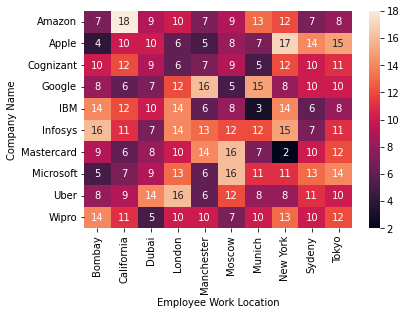

In [26]:
import seaborn as sns

result_crosstab = pd.crosstab(data["Company Name"], data["Employee Work Location"])
sns.heatmap(result_crosstab, annot=True)

If you wish to compute aggregation on some column other than the ones that make up the indexes and the column headers, you can do so by passing the aggregation column to `values` argument of `crosstab()` as shown below:

<AxesSubplot:xlabel='Employment Status', ylabel='Company Name'>

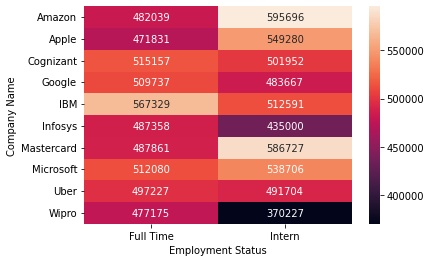

In [27]:
result_crosstab = pd.crosstab(index = data["Company Name"], 
                              columns=data["Employment Status"], 
                              values = data["Employee Salary"], 
                              aggfunc=np.mean)
                              
sns.heatmap(result_crosstab, annot = True, fmt = 'g')

### Pivot Table

Pivot tables in Pandas provide a way to cross-tabulate your data.

Although they both share numerous similarities and are conceptually the same in the context of Pandas, there are a few implementational differences that make them different (further reading [here](https://stackoverflow.com/questions/36267745/how-is-a-pandas-crosstab-different-from-a-pandas-pivot-table)).

In [28]:
pd.pivot_table(data, 
               index=["Company Name"], 
               columns=["Employee Work Location"], 
               aggfunc='size', 
               fill_value=0)

Employee Work Location,Bombay,California,Dubai,London,Manchester,Moscow,Munich,New York,Sydeny,Tokyo
Company Name,,,,,,,,,,
Amazon,7,18,9,10,7,9,13,12,7,8
Apple,4,10,10,6,5,8,7,17,14,15
Cognizant,10,12,9,6,7,9,5,12,10,11
Google,8,6,7,12,16,5,15,8,10,10
IBM,14,12,10,14,6,8,3,14,6,8
Infosys,16,11,7,14,13,12,12,15,7,11
Mastercard,9,6,8,10,14,16,7,2,10,12
Microsoft,5,7,9,13,6,16,11,11,13,14
Uber,8,9,14,16,6,12,8,8,11,10


### Handling Duplicated Data

Create DataFrame

In [56]:
new_data = data.sample(n=10)
new_data = pd.concat([new_data, new_data.sample(n=2)])

new_data

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
14,Mastercard,Software Development Engineer,Sydeny,152000,Full Time,0.6
358,Apple,Back End Developer,Bombay,926000,Full Time,4.0
813,Google,Data Scientist,Bombay,924000,Intern,2.3
84,Apple,Data Scientist,Moscow,318000,Full Time,0.7
367,IBM,Software Development Engineer-II,Munich,230000,Full Time,0.2
215,Microsoft,Data Scientist,New York,122000,Full Time,0.6
285,Apple,IOS Developer,Manchester,389000,Full Time,3.2
309,Uber,Back End Developer,Bombay,790000,Full Time,1.6
800,Cognizant,Python Developer,Moscow,639000,Full Time,4.6
417,Infosys,Software Development Engineer-II,Tokyo,444000,Full Time,2.5


#### Mark duplicated rows

In [57]:
new_data.duplicated(keep = "first")

14     False
358    False
813    False
84     False
367    False
215    False
285    False
309    False
800    False
417    False
358     True
800     True
dtype: bool

When there are duplicate values, `keep` is used to indicate which specific duplicates to mark.

   1. `keep = "first"`: (Default) Marks all duplicates as `True` except for the first occurrence.
   2. `keep = "last"`: Marks all duplicates as `True` except for the **last** occurrence.
   3. `keep = False`: Marks all duplicates as `True`.

You can filter all the rows which appear only once by passing the boolean series as flags for filtering a Pandas DataFrame as follows:

In [58]:
new_data[~new_data.duplicated(keep = False)]

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
14,Mastercard,Software Development Engineer,Sydeny,152000,Full Time,0.6
813,Google,Data Scientist,Bombay,924000,Intern,2.3
84,Apple,Data Scientist,Moscow,318000,Full Time,0.7
367,IBM,Software Development Engineer-II,Munich,230000,Full Time,0.2
215,Microsoft,Data Scientist,New York,122000,Full Time,0.6
285,Apple,IOS Developer,Manchester,389000,Full Time,3.2
309,Uber,Back End Developer,Bombay,790000,Full Time,1.6
417,Infosys,Software Development Engineer-II,Tokyo,444000,Full Time,2.5


To check duplicates on a subset of columns, pass the list of columns as the `subset` argument of `duplicated()` method as shown below:

In [60]:
new_data.duplicated(subset=["Company Name", "Employee Work Location"], keep = False)

14     False
358     True
813    False
84     False
367    False
215    False
285    False
309    False
800     True
417    False
358     True
800     True
dtype: bool

Filtering the DataFrame using the above boolean series as shown below outputs the DataFrame following the code:

In [61]:
new_data[new_data.duplicated(subset=["Company Name", "Employee Work Location"], 
                             keep = False)]

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
358,Apple,Back End Developer,Bombay,926000,Full Time,4.0
800,Cognizant,Python Developer,Moscow,639000,Full Time,4.6
358,Apple,Back End Developer,Bombay,926000,Full Time,4.0
800,Cognizant,Python Developer,Moscow,639000,Full Time,4.6


#### Remove duplicates

You can remove the duplicate rows either based on values in all columns or a subset of columns using the `drop_duplicates()` method as shown below:

In [62]:
new_data.drop_duplicates(keep = "first")

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
14,Mastercard,Software Development Engineer,Sydeny,152000,Full Time,0.6
358,Apple,Back End Developer,Bombay,926000,Full Time,4.0
813,Google,Data Scientist,Bombay,924000,Intern,2.3
84,Apple,Data Scientist,Moscow,318000,Full Time,0.7
367,IBM,Software Development Engineer-II,Munich,230000,Full Time,0.2
215,Microsoft,Data Scientist,New York,122000,Full Time,0.6
285,Apple,IOS Developer,Manchester,389000,Full Time,3.2
309,Uber,Back End Developer,Bombay,790000,Full Time,1.6
800,Cognizant,Python Developer,Moscow,639000,Full Time,4.6
417,Infosys,Software Development Engineer-II,Tokyo,444000,Full Time,2.5


Similar to `duplicated()`, the `keep` argument is used to indicate which specific duplicates you want to keep.

   1. `keep = "first"`: (Default) Drops all duplicates except for the first occurrence.
   2. `keep = "last"`: Drops all duplicates except for the last occurrence.
   3. `keep = False`: Drops all duplicates.

To drop duplicates based on the values in a subset of columns, pass the list of columns as the `subset` argument to the `drop_duplicates()` method:

In [63]:
new_data.drop_duplicates(subset=["Company Name", "Employee Work Location"], keep = False)

,Company Name,Employee Job Title,Employee Work Location,Employee Salary,Employment Status,Employee Rating
14,Mastercard,Software Development Engineer,Sydeny,152000,Full Time,0.6
813,Google,Data Scientist,Bombay,924000,Intern,2.3
84,Apple,Data Scientist,Moscow,318000,Full Time,0.7
367,IBM,Software Development Engineer-II,Munich,230000,Full Time,0.2
215,Microsoft,Data Scientist,New York,122000,Full Time,0.6
285,Apple,IOS Developer,Manchester,389000,Full Time,3.2
309,Uber,Back End Developer,Bombay,790000,Full Time,1.6
417,Infosys,Software Development Engineer-II,Tokyo,444000,Full Time,2.5
